# Challenge 8 

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt


In [158]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',\
                 header = None)

#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [159]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
from sklearn.svm import SVC
svc = SVC()
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [160]:
mapping = {'n':0, 'y':1, '?':np.nan, 'republican':0, 'democrat':1}
df_raw = df.replace(mapping)
df_Q1 = df_raw.copy(deep=True)
df_Q1.iloc[:,1:] = df_Q1.iloc[:,1:].apply(lambda x: x.fillna(np.nanmean(x.values)), axis = 0).round(2)

In [161]:
X = df_Q1.drop(0, axis = 1)
y = df_Q1[0]

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4444)

In [163]:
list_of_models = [lr(), knc, rfc, dtc, svc, gn]
for model in list_of_models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    conf = confusion_matrix(y_test,y_pred)
    TP = conf[1][1]
    TN = conf[0][0]
    FN = conf[0][1]
    FP = conf[1][0]
    accuracy = (TP + TN) / (TP + FP + TP + TN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = (2*(recall * precision)) / (recall + precision)
    print(str(model)[:10],'accuracy',accuracy.round(2), 'precision',precision.round(2),\
          'recall',recall.round(2), 'F1',F1.round(2))

LogisticRe accuracy 0.62 precision 0.97 recall 0.93 F1 0.95
KNeighbors accuracy 0.61 precision 0.94 recall 0.92 F1 0.93
RandomFore accuracy 0.62 precision 0.97 recall 0.96 F1 0.97
DecisionTr accuracy 0.61 precision 0.96 recall 0.91 F1 0.94
SVC(C=1.0, accuracy 0.62 precision 0.97 recall 0.95 F1 0.96
GaussianNB accuracy 0.62 precision 0.99 recall 0.92 F1 0.95


/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [164]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


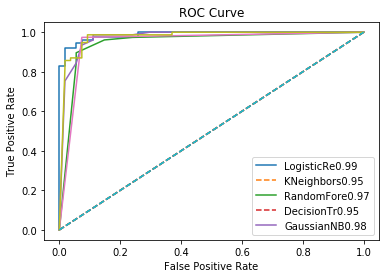

In [165]:
lst = []
from sklearn.metrics import roc_curve
ax, fig = plt.subplots(1,1)
for model in list_of_models:
    if model != svc:
        model.fit(X_train, y_train)
        fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr)
        x = np.linspace(0,1, 100000)
        plt.plot(x, x, linestyle='--')
        plt.title('ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        lst.append(str(model)[:10] + str((auc).round(2)))
plt.legend(lst)

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

In [166]:
lst = []
list_of_models = [lr(), knc, rfc, dtc, svc, gn]
for model in list_of_models:
    accuracy = np.mean(cross_val_score(model, X, y, scoring='accuracy'),axis=0)
    precision = np.mean(cross_val_score(model, X, y, scoring='precision'),axis=0)
    recall = np.mean(cross_val_score(model, X, y, scoring='recall'), axis=0)
    F1 = 2 * (precision * recall) / (precision + recall)
#     F1 = cross_val_score(model, X, y, scoring='F1')
    print([str(model)[:10],'accuracy',accuracy.round(2), 'precision',precision.round(2),\
          'recall',recall.round(2), 'F1',F1.round(2)])
    lst.append([str(model)[:10],'accuracy',accuracy.round(2), 'precision',precision.round(2),\
          'recall',recall.round(2), 'F1',F1.round(2)])
lst

/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python

['LogisticRe', 'accuracy', 0.96, 'precision', 0.97, 'recall', 0.97, 'F1', 0.97]
['KNeighbors', 'accuracy', 0.93, 'precision', 0.96, 'recall', 0.93, 'F1', 0.94]
['RandomFore', 'accuracy', 0.96, 'precision', 0.98, 'recall', 0.96, 'F1', 0.97]
['DecisionTr', 'accuracy', 0.95, 'precision', 0.97, 'recall', 0.96, 'F1', 0.96]
['SVC(C=1.0,', 'accuracy', 0.95, 'precision', 0.98, 'recall', 0.95, 'F1', 0.96]
['GaussianNB', 'accuracy', 0.93, 'precision', 0.95, 'recall', 0.94, 'F1', 0.94]


/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ikennaigboaka/anaconda3/lib/python3.6/site-packages/sk

[['LogisticRe',
  'accuracy',
  0.96,
  'precision',
  0.97,
  'recall',
  0.97,
  'F1',
  0.97],
 ['KNeighbors',
  'accuracy',
  0.93,
  'precision',
  0.96,
  'recall',
  0.93,
  'F1',
  0.94],
 ['RandomFore',
  'accuracy',
  0.96,
  'precision',
  0.98,
  'recall',
  0.96,
  'F1',
  0.97],
 ['DecisionTr',
  'accuracy',
  0.95,
  'precision',
  0.97,
  'recall',
  0.96,
  'F1',
  0.96],
 ['SVC(C=1.0,',
  'accuracy',
  0.95,
  'precision',
  0.98,
  'recall',
  0.95,
  'F1',
  0.96],
 ['GaussianNB',
  'accuracy',
  0.93,
  'precision',
  0.95,
  'recall',
  0.94,
  'F1',
  0.94]]

In [167]:
lst

[['LogisticRe',
  'accuracy',
  0.96,
  'precision',
  0.97,
  'recall',
  0.97,
  'F1',
  0.97],
 ['KNeighbors',
  'accuracy',
  0.93,
  'precision',
  0.96,
  'recall',
  0.93,
  'F1',
  0.94],
 ['RandomFore',
  'accuracy',
  0.96,
  'precision',
  0.98,
  'recall',
  0.96,
  'F1',
  0.97],
 ['DecisionTr',
  'accuracy',
  0.95,
  'precision',
  0.97,
  'recall',
  0.96,
  'F1',
  0.96],
 ['SVC(C=1.0,',
  'accuracy',
  0.95,
  'precision',
  0.98,
  'recall',
  0.95,
  'F1',
  0.96],
 ['GaussianNB',
  'accuracy',
  0.93,
  'precision',
  0.95,
  'recall',
  0.94,
  'F1',
  0.94]]

#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.
